<a href="https://colab.research.google.com/github/eftekhar-hossain/Teaching/blob/main/Lab_05_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ETE-456 Machine Learning Sessional

Lab-05: **Exploring different types of Classification Algorithms**

> Objective: 
 1. *Apply various classification algorithms on a real world dataset.*



Different types of Regression Algorithm

1. Logistic Regression
2. K Nearest Neighbor (KNN) 
3. Decision Tree Classifier
4. Random Forest Classifier
5.  Naive Bayes
6. Support Vector Machine (SVM) 


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Import the libraries

In [ ]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt       

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Logistic Regression

##Dataset

In [ ]:
# Download the data
!wget -O Social_Network_Ads.csv https://www.dropbox.com/s/o8v5zpw972uwlxy/Social_Network_Ads.csv?dl=0

Based on Age and Estimated Salary can a person able to purchase a car?🚗

In [ ]:
"""importing the dataset """

dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
dataset['Age'].duplicated().sum()

357

In [ ]:
feature = dataset[['Age','EstimatedSalary']]  # for independent
target = dataset[['Purchased']]   # for dependent

In [ ]:
feature

In [ ]:
target

##Splitting the Dataset

In [ ]:
"""Spliting the Dataset into Training Set and Test Set """

X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size = 0.2,random_state = 0)
# random_state = 0 is select to get the same result

In [ ]:
print(X_train.shape)
print(X_test.shape)

(320, 2)
(80, 2)


In [ ]:
X_test

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
14,18,82000
363,42,79000
304,40,60000
361,53,34000


#Feature Scaling

In [ ]:
X_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)
X_test = X_sc.transform(X_test) 

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Fitting Logistic Regression to the training dataset
lr = LogisticRegression()

lr.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# prediction
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

In [ ]:
# Making confusing matrix (actual,prediction)
confusion_matrix(y_test,y_pred)

array([[57,  1],
       [ 5, 17]])

In [ ]:
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

              precision    recall  f1-score   support

          No       0.92      0.98      0.95        58
         Yes       0.94      0.77      0.85        22

    accuracy                           0.93        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.93      0.93      0.92        80



#KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Classifier Model
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[55  3]
 [ 1 21]]
              precision    recall  f1-score   support

          No       0.98      0.95      0.96        58
         Yes       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



#SVM

In [ ]:
from sklearn.svm import SVC

# Classifier Model
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[57  1]
 [ 6 16]]
              precision    recall  f1-score   support

          No       0.90      0.98      0.94        58
         Yes       0.94      0.73      0.82        22

    accuracy                           0.91        80
   macro avg       0.92      0.86      0.88        80
weighted avg       0.91      0.91      0.91        80



#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Classifier Model
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[53  5]
 [ 3 19]]
              precision    recall  f1-score   support

          No       0.95      0.91      0.93        58
         Yes       0.79      0.86      0.83        22

    accuracy                           0.90        80
   macro avg       0.87      0.89      0.88        80
weighted avg       0.90      0.90      0.90        80



#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Classifier Model
classifier = RandomForestClassifier(n_estimators=10, criterion ='entropy', random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)


In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[54  4]
 [ 3 19]]
              precision    recall  f1-score   support

          No       0.95      0.93      0.94        58
         Yes       0.83      0.86      0.84        22

    accuracy                           0.91        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.91      0.91      0.91        80



#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Classifier Model
classifier = GaussianNB()
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[55  3]
 [ 4 18]]
              precision    recall  f1-score   support

          No       0.93      0.95      0.94        58
         Yes       0.86      0.82      0.84        22

    accuracy                           0.91        80
   macro avg       0.89      0.88      0.89        80
weighted avg       0.91      0.91      0.91        80



#Reference


1.   [SuperDataScience](https://www.superdatascience.com/pages/machine-learning)



#Stroke Prediction Dataset


**Context**
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

**Attribute Information**
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient


**Task**

Can you predict whether a patient is likely to get stroke?

In [ ]:
# Download the data
!wget -O stroke-data.csv https://www.dropbox.com/s/zgburk3yces5tee/healthcare-dataset-stroke-data.csv?dl=0

In [ ]:
"""importing the dataset """

dataset = pd.read_csv('stroke-data.csv')
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#Exploratory Data Analysis

1. Pandas Profiling
2. Klib
3. Sweet Viz
4. Auto Viz

##Pandas Profiling

In [ ]:
!pip install pandas-profiling==2.8.0

In [ ]:
# # Standard Library Imports
# from pathlib import Path

# Installed packages
import pandas as pd
from ipywidgets import widgets

# Our package
from pandas_profiling import ProfileReport
#from pandas_profiling.utils.cache import cache_file

In [ ]:
### To Create the Simple report quickly
profile = ProfileReport(dataset, title='Pandas Profiling Report', explorative=True)

In [ ]:
# The Notebook Widgets Interface
profile.to_widgets()

In [ ]:
# Or use the HTML report in an iframe
profile.to_file("output.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#Klib

In [ ]:
! pip install klib

In [ ]:
import klib

In [ ]:
klib.corr_mat(dataset) # returns a color-encoded correlation matrix

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.00,0.00,0.00,-0.00,0.00,0.00,0.01
age,0.00,1.00,0.28,0.26,0.24,0.33,0.25
hypertension,0.00,0.28,1.00,0.11,0.17,0.17,0.13
heart_disease,-0.00,0.26,0.11,1.00,0.16,0.04,0.13
avg_glucose_level,0.00,0.24,0.17,0.16,1.00,0.18,0.13
bmi,0.00,0.33,0.17,0.04,0.18,1.00,0.04
stroke,0.01,0.25,0.13,0.13,0.13,0.04,1.00


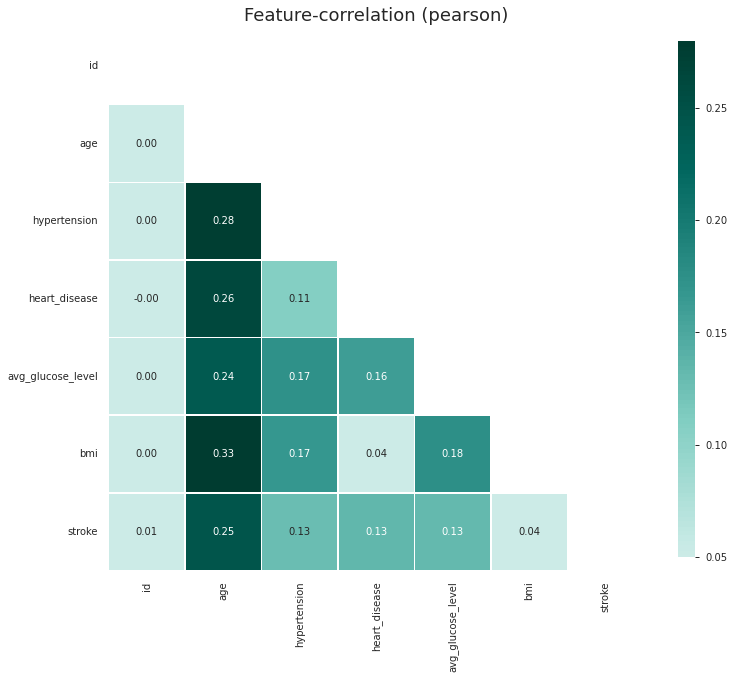

In [ ]:
klib.corr_plot(dataset)

##SweetViz

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv
#Generating Sweetviz report
report = sv.analyze(dataset)
report.show_html("stock_report.html") # specify a name for the report

                                             |          | [  0%]   00:00 -> (? left)

Report stock_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#AutoViz

In [ ]:
!pip install autoviz

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()


In [ ]:
filename = "stroke-data.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="png",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=None
)